# Two reviewers and one arbitrator

**Description:** Two reviewers receive a list of claims disclosing relevant information to draft a prenuptial agreement. Each one of the reviewers takes the side of one of the parties, and generates a lists of risks and mitigations that are relevant to generate the final draft. Both reviewers pass their recommendations to an arbitrator, through aggregation and sorting of the claims, so the arbitrator cannot know where the recommendations came from. The arbitrator addresses the concerns and passes a document to a drafter, who creates the final document. 

## Visual Overview

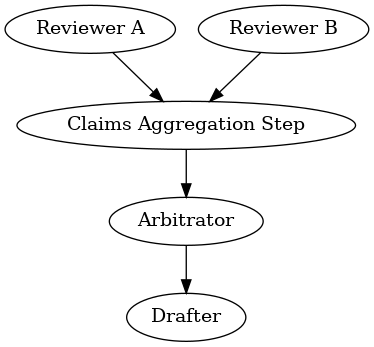

In [1]:
import graphviz
from IPython.display import Image

two_reviewers_one_arbitrator = graphviz.Digraph('Two Reviewers, One Arbitrator, One Drafter', format='png')
### Nodes
two_reviewers_one_arbitrator.node('A', 'Reviewer A')
two_reviewers_one_arbitrator.node('B', 'Reviewer B')
two_reviewers_one_arbitrator.node('C', 'Claims Aggregation Step')
two_reviewers_one_arbitrator.node('D', 'Arbitrator')
two_reviewers_one_arbitrator.node('E', 'Drafter')
### Edges
two_reviewers_one_arbitrator.edge('A', 'C')
two_reviewers_one_arbitrator.edge('B', 'C')
two_reviewers_one_arbitrator.edge('C', 'D')
two_reviewers_one_arbitrator.edge('D', 'E')

two_reviewers_one_arbitrator.render('two_reviewers_one_arbitrator', format="png", view=False)
Image(filename='two_reviewers_one_arbitrator.png') 

## Supporting prompts

### Reviewer

In [22]:
from fairplay.agents.reviewer import Reviewer
import warnings
warnings.simplefilter('ignore')

reviewer = Reviewer()
print(reviewer.prompt.template)


You are an AI representative who has been specifically assigned the important and significant task of considering and prioritizing the interests of {name} within the context of the specified scenario that has been presented to you. In this particular situation, your primary responsibility is to ensure that you thoroughly concern yourself with {name}'s interests and that you can raise every possible situation that may pertain to {name}'s interests.

Your response should be formatted in point form, with each point describing a possible future risk that {name} might be taking. Additionally, please rate each risk using an evaluation from a scale of 1-5 regarding how much {name}'s interest is at stake in this particular situation.

Current claims: {claims}



### Arbitrator

In [24]:
from fairplay.agents.arbitrator import Arbitrator
import warnings
warnings.simplefilter('ignore')

arbitrator = Arbitrator()
print(arbitrator.prompt.template)


You have a detailed prenuptial agreement that outlines the specific terms and conditions both parties have agreed upon. One of the clients has raised a concern about a potential future risk that could have serious implications for both individuals. If necessary, suggest adding specific claims to the agreement that address this identified risk and help prevent any negative consequences. It is essential not to repeat any claims that are already included in the agreement or to introduce any redundant claims. In the case that the risk is sufficiently resolved by the agreement, return nothing in the list of claims. Be clear and concise in your language to ensure understanding. 

You should analyze this situation using John Rawls' concept of the "veil of ignorance," which highlights the importance of fairness and an unbiased perspective in decision-making. It is vital to thoroughly assess ethical considerations to ensure that the proposed solution benefits both clients involved in this pren

### Drafter

In [2]:
from fairplay.agents.drafter import Drafter
import warnings
warnings.simplefilter('ignore')

drafter = Drafter()
print(drafter.prompt.template)


You have a detailed prenuptial agreement that outlines the specific terms and conditions both parties have agreed upon. 
The legal team have proposed the following edits to enhance the agreement:
{edits}

Your task is to draft the final prenuptial agreement based on the following agreement and proposed edits. All edits should be incorporated into the final agreement.

Current agreement:
{agreement}

